ライブラリのインポート

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sqlalchemy import create_engine
import sqlite3

データベースクラスの定義

In [17]:
class TourismDB:
    def __init__(self, db_path):
        self.db_path = db_path

    def query(self, sql):
        conn = sqlite3.connect(self.db_path)
        df = pd.read_sql_query(sql, conn)
        conn.close()
        return df

データの分析と可視化を行うクラスの定義

In [18]:
class DataAnalyzer:
    def __init__(self, df):
        self.df = df

    def plot_data(self, title="国別訪日外国人数"):
        if self.df.empty:
            print("データがありません。")
            return

        # フォントの設定 (必要に応じてパスを変更)
        font_path = '/System/Library/Fonts/ヒラギノ角ゴシック W6.ttc'
        font_prop = fm.FontProperties(fname=font_path)

        self.df.plot(kind='bar', x='country_name', y='number_of_foreigners', legend=False)
        plt.xlabel('国名', fontproperties=font_prop)
        plt.ylabel('訪日外国人数', fontproperties=font_prop)
        plt.title(title, fontproperties=font_prop)
        
        # x軸のラベルを日本語フォントに設定
        plt.xticks(fontproperties=font_prop, rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

メイン実行コード

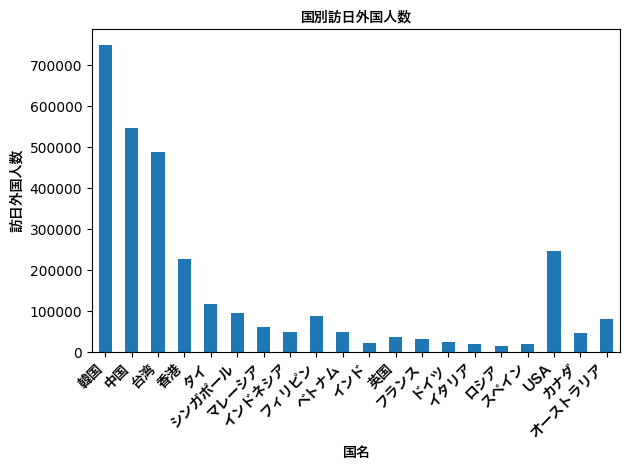

In [20]:
def main():
    db_path = 'tourism.db'
    tourism_db = TourismDB(db_path)

    # SQLクエリを定義
    sql_query = "SELECT * FROM tourism_data"

    # データをクエリ
    df = tourism_db.query(sql_query)

    # データの分析と可視化
    analyzer = DataAnalyzer(df)
    analyzer.plot_data()

# メイン関数の実行
main()